In [2]:
import pandas as pd

# Load the dataset
file_path = 'filtered_agri_food_data.csv'  # Update with the actual path
df = pd.read_csv(file_path)

# 1. Identify WPI columns (Columns representing WPI data from 2012 to 2023)
wpi_columns = [col for col in df.columns if col.startswith('INDX')]

# 2. Reshape the data to long format using pd.melt
df_melted = pd.melt(df, id_vars=['COMM_NAME', 'COMM_CODE', 'COMM_WT'], 
                    value_vars=wpi_columns, 
                    var_name='Date', value_name='WPI')

# 3. Convert 'Date' from 'INDXMMYYYY' format to datetime
df_melted['Date'] = pd.to_datetime(df_melted['Date'].str[4:], format='%m%Y')

# 4. Handle missing values by linear interpolation
df_melted['WPI'] = df_melted['WPI'].interpolate(method='linear')

# 5. Sort the data by commodity and date for time series consistency
df_melted = df_melted.sort_values(by=['COMM_NAME', 'Date'])

# 6. Feature Engineering: Create lag features and moving averages
# Create lag features (e.g., 1-month and 3-month lagged values)
df_melted['WPI_Lag_1'] = df_melted.groupby('COMM_NAME')['WPI'].shift(1)
df_melted['WPI_Lag_3'] = df_melted.groupby('COMM_NAME')['WPI'].shift(3)

# Create moving average features (e.g., 3-month moving average)
df_melted['WPI_MA_3'] = df_melted.groupby('COMM_NAME')['WPI'].rolling(window=3).mean().reset_index(level=0, drop=True)

# 7. Reset index and save the preprocessed dataset
df_melted.reset_index(drop=True, inplace=True)

# Save the preprocessed data to a CSV file
df_melted.to_csv('preprocessed_wpi_data1.csv', index=False)

# Display the first few rows of the processed data
print(df_melted.head())


                              COMM_NAME   COMM_CODE  COMM_WT       Date  \
0  (C). MANUFACTURE OF TOBACCO PRODUCTS  1303000000  0.51357 2012-04-01   
1  (C). MANUFACTURE OF TOBACCO PRODUCTS  1303000000  0.51357 2012-05-01   
2  (C). MANUFACTURE OF TOBACCO PRODUCTS  1303000000  0.51357 2012-06-01   
3  (C). MANUFACTURE OF TOBACCO PRODUCTS  1303000000  0.51357 2012-07-01   
4  (C). MANUFACTURE OF TOBACCO PRODUCTS  1303000000  0.51357 2012-08-01   

     WPI  WPI_Lag_1  WPI_Lag_3    WPI_MA_3  
0  106.1        NaN        NaN         NaN  
1  107.9      106.1        NaN         NaN  
2  108.2      107.9        NaN  107.400000  
3  107.2      108.2      106.1  107.766667  
4  107.9      107.2      107.9  107.766667  


In [3]:
import pandas as pd

# Load your dataset
file_path = 'dataset.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

# Complete list of keywords for food and agriculture-related commodities
agri_food_keywords = [
    'Bajra', 'Moong', 'Masur', 'Peas', 'Chawali', 'Cauliflower', 'Okra', 'Beans', 'Drumstick', 'Orange',
    'Cashew nut', 'Grapes', 'Litchi', 'Mosambi', 'Sweet Orange', 'Pear', 'Black Pepper', 'Garlic', 'Coriander',
    'Tamarind', 'Cotton', 'Raw Wool', 'Raw Silk', 'Cotton Seed', 'Copra', 'Coconut', 'Gingelly', 'Sesamum', 
    'Safflower', 'Tanning Materials', 'Tobacco', 'Raw Rubber', 'Industrial wood', 'Fodder', 'Rose', 'Marigold',
    'Buffalo meat', 'Fish', 'Cotton seed Oil', 'Dairy products', 'Ice cream', 'Wheat flour', 'Basmati rice',
    'Biscuit', 'cookies', 'Chocolate', 'Spices', 'Processed food', 'Animal feeds', 'Soya preparations',
    'Liquor', 'Soft drinks', 'Pulses', 'Arhar', 'Urad', 'Potato', 'Cabbage', 'Carrot', 'Pointed gourd', 
    'Mango', 'Amla', 'Eggs', 'Meat', 'Fish-Inland', 'Mutton', 'Poultry', 'Raw Jute', 'Castor Seed', 
    'Shrimps', 'Fruit pulp', 'Vanaspati', 'Groundnut Oil', 'Condensed Milk', 'Ghee', 'Sugar', 'Honey',
    'Macaroni', 'Noodles', 'Processed Tea', 'Instant Coffee', 'Salt', 'Corn Flake', 'Whey powder',
    'Rice Bran Extract', 'Paddy', 'Barley', 'Tapioca', 'Radish', 'Cucumber', 'Pumpkin', 'Jackfruit', 'Milk',
    'Fish-Marine', 'Turmeric', 'Cardamom', 'Ginger', 'Cumin', 'Tea', 'Coffee', 'Mesta', 'Groundnut Seed',
    'Niger Seed', 'Sunflower', 'Chicken', 'Soyabean Oil', 'Castor Oil', 'Palm Oil', 'Wheat Bran', 'Gram powder',
    'Non-basmati Rice', 'Cakes', 'Pastries', 'Muffins', 'Processed food', 'Fruit juice', 'Sunflower Oil',
    'Powder Milk', 'Maida', 'Sooji', 'Confectionary', 'Chillies', 'Betelnut', 'Arecanut', 'Gola', 'Rice',
    'Molasses', 'Mustard Oil', 'Copra oil', 'Butter', 'Vegetable starch', 'Bakery products', 'Bread', 
    'Buns', 'Croissant', 'Beer', 'Sweet Potato', 'Onion', 'Tomato', 'Bitter gourd', 'Coconut', 'Papaya',
    'Almonds', 'Chillies Dry', 'Betelnut', 'Arecanut', 'Vanaspati', 'Mutton', 'Egg', 'Pork', 'Betel Leaves',
    'Sugarcane', 'Soyabean', 'Gaur Seed', 'Jams', 'Jellies', 'Marmalades', 'Puree', 'Vegetable sauces', 
    'Tomato', 'Chilli', 'Soya sauces', 'Condiments', 'Spirits', 'Wine', 'Rectified spirit', 'Aerated drinks',
    'Soft drinks', 'Biri', 'Ragi', 'Rajma', 'Green Peas', 'Brinjal', 'Bottle gourd', 'Banana', 'Apple', 
    'Pineapple', 'Guava', 'Lemon', 'Sapota', 'Pomegranate', 'Walnut', 'Wheat', 'Maize', 'Gram'
]

# Filter the dataset based on commodity names that match the agriculture and food-related keywords
df_agri_food = df[df['COMM_NAME'].str.contains('|'.join(agri_food_keywords), case=False, na=False)]

# Save the filtered data to a new CSV
df_agri_food.to_csv('filtered_agri_food_data.csv', index=False)

# Display the filtered data
print(df_agri_food.head())


      COMM_NAME   COMM_CODE  COMM_WT  INDX042012  INDX052012  INDX062012  \
0         Bajra  1101010104  0.08637       107.7       109.3       107.0   
1         Moong  1101010203  0.07088        96.3        96.0        96.6   
2         Masur  1101010204  0.05299       102.5       107.4       109.7   
3  Peas/Chawali  1101010206  0.02444       113.2       123.1       134.3   
4   Cauliflower  1101020108  0.16697       119.1         0.0         0.0   

   INDX072012  INDX082012  INDX092012  INDX102012  ...  INDX012023  \
0       113.9       120.7       121.7       114.8  ...       224.1   
1       103.6       108.7       108.4       112.2  ...       167.7   
2       115.2       119.2       119.0       118.6  ...       199.0   
3       147.4       143.3       153.8       146.6  ...       160.4   
4         0.0         0.0       134.6       129.4  ...       161.1   

   INDX022023  INDX032023  INDX042023  INDX052023  INDX062023  INDX072023  \
0       219.6       225.1       229.6       2

          COMM_CODE       COMM_WT                           Date  \
count  2.793900e+04  27939.000000                          27939   
mean   1.201032e+09      0.252100  2017-12-31 04:08:37.985611520   
min    1.101010e+09      0.002100            2012-04-01 00:00:00   
25%    1.101020e+09      0.026920            2015-02-01 00:00:00   
50%    1.102040e+09      0.086370            2018-01-01 00:00:00   
75%    1.301100e+09      0.231330            2020-12-01 00:00:00   
max    1.320010e+09      4.439990            2023-10-01 00:00:00   
std    1.005801e+08      0.564945                            NaN   

                WPI     WPI_Lag_1     WPI_Lag_3      WPI_MA_3  
count  27939.000000  27738.000000  27336.000000  27537.000000  
mean     137.763964    137.485871    136.939607    137.736731  
min        0.000000      0.000000      0.000000      0.000000  
25%      113.300000    113.200000    113.000000    113.600000  
50%      130.600000    130.500000    130.200000    130.666667  
75%

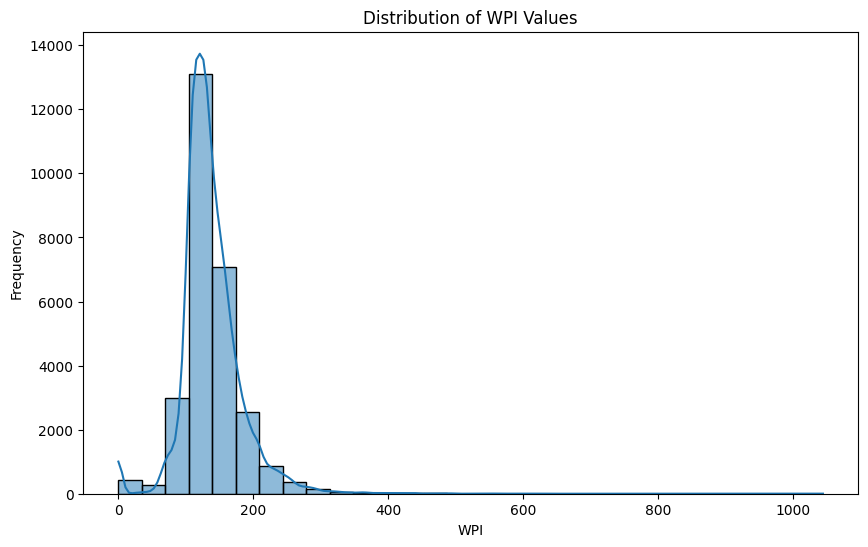

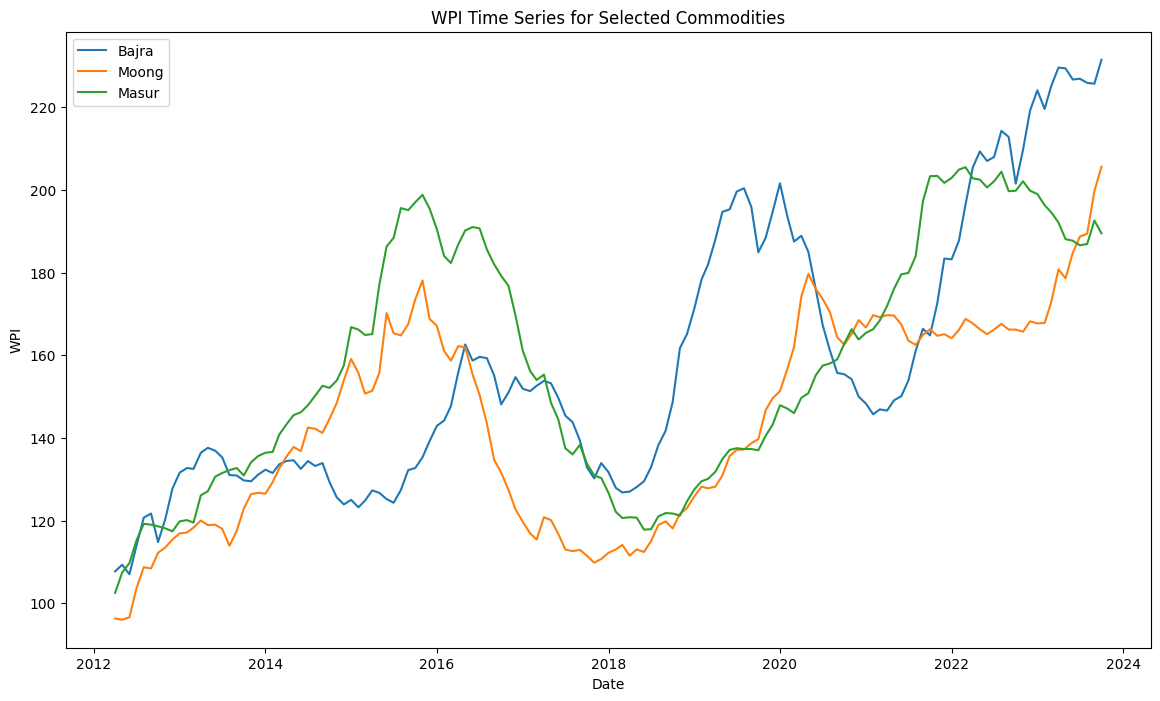

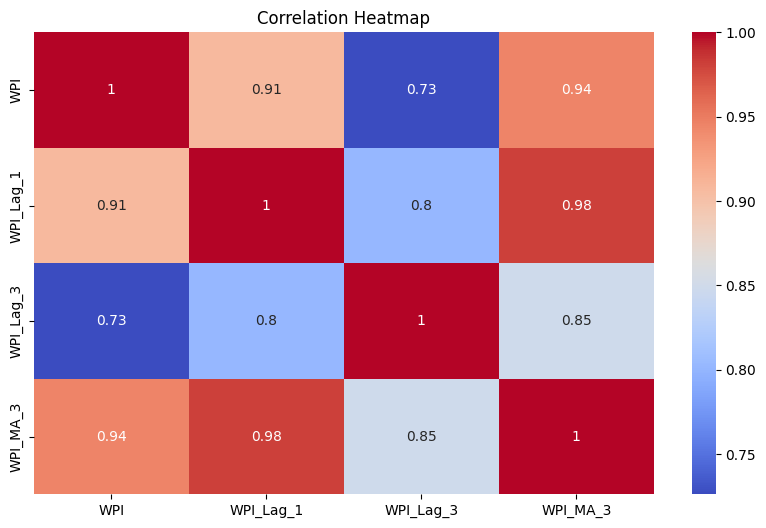

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

# Display basic statistics
print(df_melted.describe())

# Plot the distribution of WPI values
plt.figure(figsize=(10, 6))
sns.histplot(df_melted['WPI'], bins=30, kde=True)
plt.title('Distribution of WPI Values')
plt.xlabel('WPI')
plt.ylabel('Frequency')
plt.show()

# Plot the time series of WPI for a few selected commodities
selected_commodities = ['Bajra', 'Moong', 'Masur']
plt.figure(figsize=(14, 8))
for commodity in selected_commodities:
    subset = df_melted[df_melted['COMM_NAME'] == commodity]
    plt.plot(subset['Date'], subset['WPI'], label=commodity)

plt.title('WPI Time Series for Selected Commodities')
plt.xlabel('Date')
plt.ylabel('WPI')
plt.legend()
plt.show()

# Correlation heatmap of WPI and its lag features
plt.figure(figsize=(10, 6))
corr_matrix = df_melted[['WPI', 'WPI_Lag_1', 'WPI_Lag_3', 'WPI_MA_3']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [5]:
# Creating lag features (e.g., 1-month and 3-month lag)
df['WPI_Lag_1'] = df.groupby('COMM_NAME')['WPI'].shift(1)
df['WPI_Lag_3'] = df.groupby('COMM_NAME')['WPI'].shift(3)

# Creating moving averages (e.g., 3-month moving average)
df['WPI_MA_3'] = df.groupby('COMM_NAME')['WPI'].rolling(window=3).mean().reset_index(level=0, drop=True)

# Dropping rows with NaN values caused by lagging
df.dropna(inplace=True)

# Display the dataset with new features
print(df.head())


KeyError: 'Column not found: WPI'

          COMM_CODE       COMM_WT           WPI     WPI_Lag_1     WPI_Lag_3  \
count  2.793900e+04  27939.000000  27939.000000  27738.000000  27336.000000   
mean   1.201032e+09      0.252100    137.763964    137.485871    136.939607   
std    1.005801e+08      0.564945     45.257603     44.982997     44.217012   
min    1.101010e+09      0.002100      0.000000      0.000000      0.000000   
25%    1.101020e+09      0.026920    113.300000    113.200000    113.000000   
50%    1.102040e+09      0.086370    130.600000    130.500000    130.200000   
75%    1.301100e+09      0.231330    155.900000    155.600000    154.900000   
max    1.320010e+09      4.439990   1043.600000   1043.600000   1043.600000   

           WPI_MA_3  
count  27537.000000  
mean     137.736731  
std       43.049399  
min        0.000000  
25%      113.600000  
50%      130.666667  
75%      155.700000  
max      702.300000  
COMM_NAME     object
COMM_CODE      int64
COMM_WT      float64
Date          object
WPI   

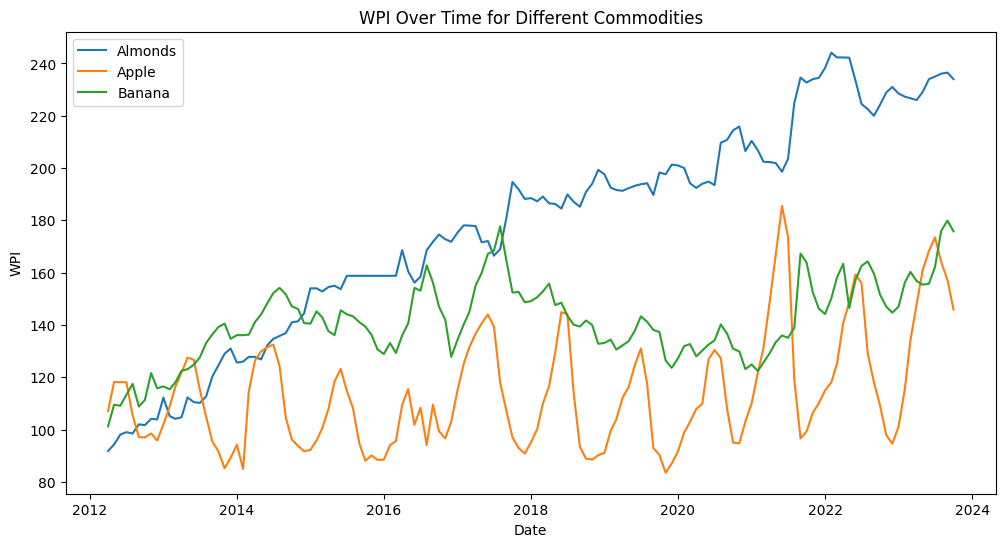

Correlation Matrix:
           COMM_CODE   COMM_WT       WPI
COMM_CODE   1.000000 -0.703226  0.575716
COMM_WT    -0.703226  1.000000 -0.156762
WPI         0.575716 -0.156762  1.000000


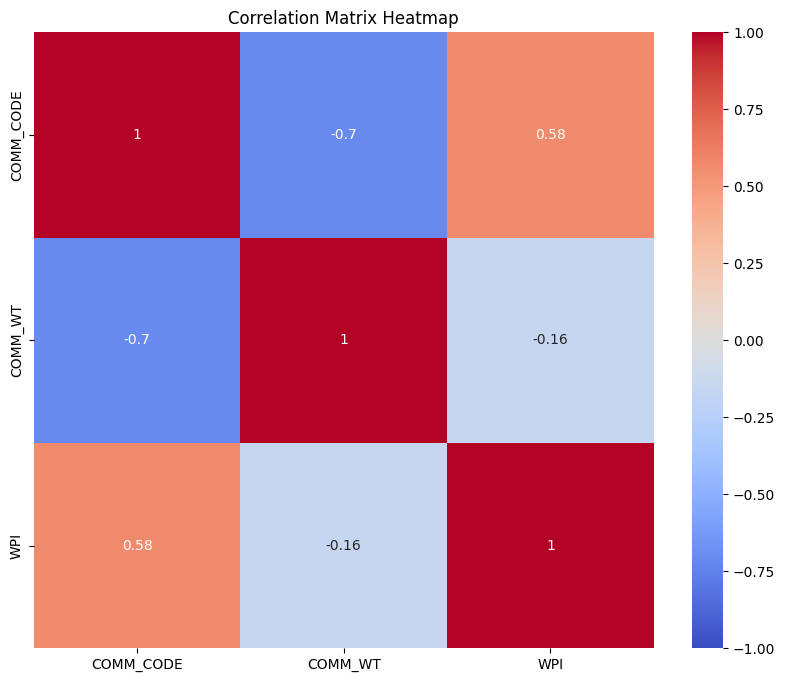

<Figure size 1200x600 with 0 Axes>

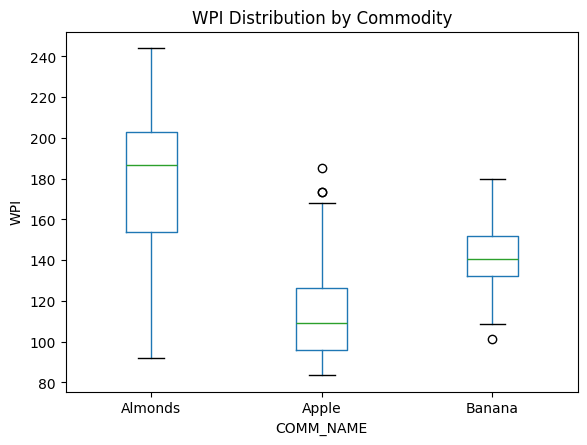

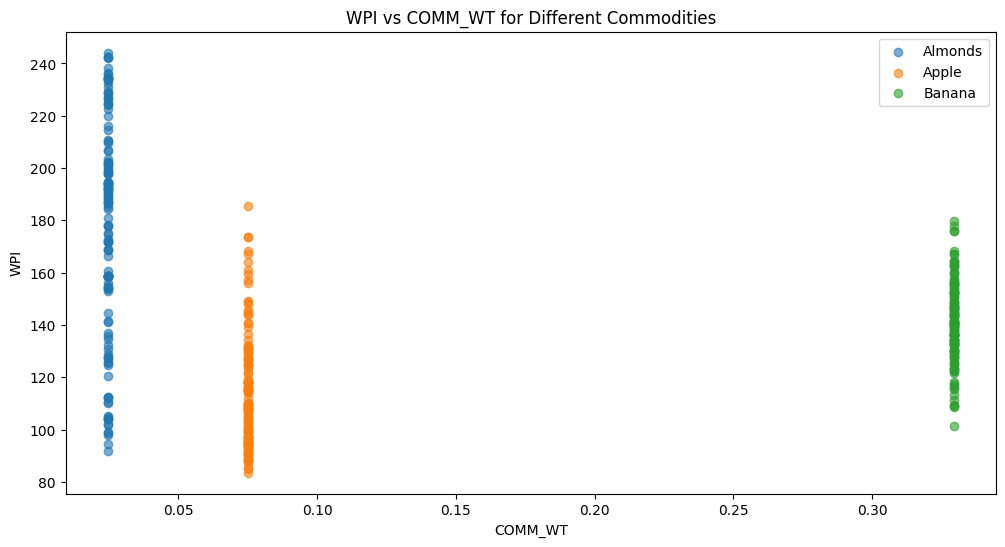


Statistical Summary for Almonds:
count    139.000000
mean     176.933094
std       41.367882
min       91.800000
25%      153.850000
50%      186.500000
75%      202.950000
max      244.100000
Name: WPI, dtype: float64

Statistical Summary for Apple:
count    139.000000
mean     114.050360
std       21.894332
min       83.500000
25%       96.050000
50%      109.400000
75%      126.550000
max      185.500000
Name: WPI, dtype: float64

Statistical Summary for Banana:
count    139.000000
mean     141.113669
std       15.080039
min      101.200000
25%      132.350000
50%      140.500000
75%      151.650000
max      179.900000
Name: WPI, dtype: float64


C:\Users\unnie\AppData\Local\Temp\ipykernel_87020\1593745133.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = df_filtered['Date'].dt.to_period('M')


<Figure size 1200x600 with 0 Axes>

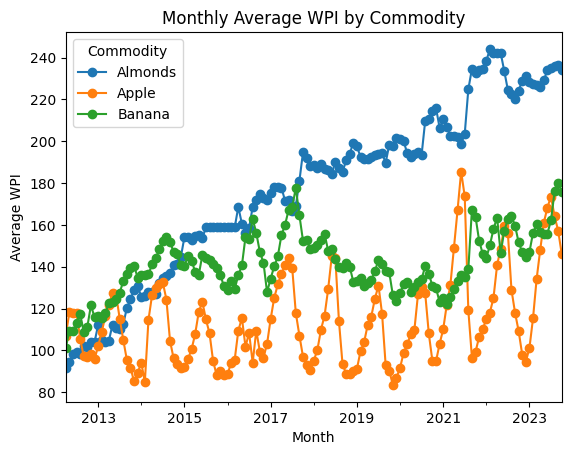

Testing stationarity of the time series:
ADF Statistic: -0.11881195671358465
p-value: 0.9475322538027872
Critical Values:
	1%: -3.482920063655088
	5%: -2.884580323367261
	10%: -2.5790575441750883

Testing stationarity after differencing:
ADF Statistic: -8.469796426154788
p-value: 1.488311659133147e-13
Critical Values:
	1%: -3.482920063655088
	5%: -2.884580323367261
	10%: -2.5790575441750883
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1202.763, Time=0.45 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1259.851, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1179.991, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1256.384, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1181.706, Time=0.59 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1180.909, Time=0.39 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1193.527, Time=0.26 sec
 ARIMA(1,1,0)(2,1,1)[12]        

c:\Users\unnie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\unnie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\unnie\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    WPI   No. Observations:                  139
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -633.496
Date:                Wed, 16 Oct 2024   AIC                           1278.992
Time:                        15:24:30   BIC                           1296.555
Sample:                    04-01-2012   HQIC                          1286.129
                         - 10-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3947      0.080      4.913      0.000       0.237       0.552
ar.L2         -0.2184      0.092     -2.370      0.018      -0.399      -0.038
ar.L3         -0.1052      0.089     -1.181      0.2

C:\Users\unnie\AppData\Local\Temp\ipykernel_87020\1593745133.py:127: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='M')[1:]


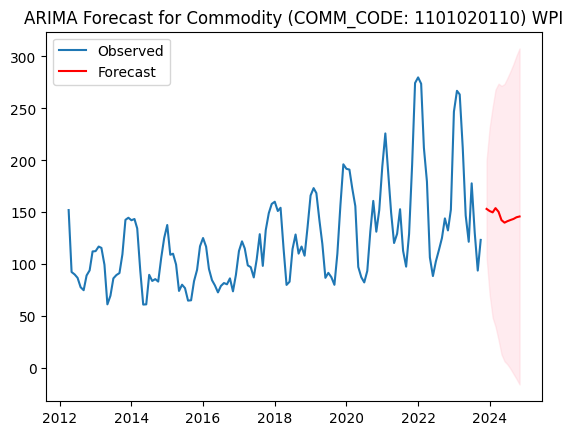


Forecast for the next 12 periods:
2023-11-01    153.303161
2023-12-01    151.261819
2024-01-01    149.971964
2024-02-01    154.069685
2024-03-01    150.518120
2024-04-01    142.503715
2024-05-01    140.080082
2024-06-01    141.517053
2024-07-01    142.638902
2024-08-01    143.687111
2024-09-01    145.266664
2024-10-01    146.024259
Freq: MS, Name: predicted_mean, dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
# File path
file_path = 'preprocessed_wpi_data1.csv'  # Update with the actual path

# Read the CSV file
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.describe())
print(df.dtypes)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter the dataframe for specific commodities
df_filtered = df[df['COMM_NAME'].isin(['Almonds', 'Apple', 'Banana'])]


# Create a time series plot
plt.figure(figsize=(12, 6))
for commodity in ['Almonds', 'Apple', 'Banana']:
    data = df_filtered[df_filtered['COMM_NAME'] == commodity]
    plt.plot(data['Date'], data['WPI'], label=commodity)
plt.xlabel('Date')
plt.ylabel('WPI')
plt.title('WPI Over Time for Different Commodities')
plt.legend()
plt.show()

# Calculate correlation coefficients
correlation = df_filtered[['COMM_CODE', 'COMM_WT', 'WPI']].corr()
print("Correlation Matrix:")
print(correlation)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

plt.figure(figsize=(12, 6))
df_filtered.boxplot(column='WPI', by='COMM_NAME', grid=False)
plt.title('WPI Distribution by Commodity')
plt.suptitle('')  # Remove the automatic suptitle
plt.ylabel('WPI')
plt.xticks(rotation=0)  # Keep labels horizontal
plt.show()

plt.figure(figsize=(12, 6))
for commodity in ['Almonds', 'Apple', 'Banana']:
    data = df_filtered[df_filtered['COMM_NAME'] == commodity]
    plt.scatter(data['COMM_WT'], data['WPI'], label=commodity, alpha=0.6)
plt.xlabel('COMM_WT')
plt.ylabel('WPI')
plt.title('WPI vs COMM_WT for Different Commodities')
plt.legend()
plt.show()

for commodity in ['Almonds', 'Apple', 'Banana']:
    data = df_filtered[df_filtered['COMM_NAME'] == commodity]['WPI']
    print(f"\nStatistical Summary for {commodity}:")
    print(data.describe())

df_filtered['Month'] = df_filtered['Date'].dt.to_period('M')
monthly_avg = df_filtered.groupby(['Month', 'COMM_NAME'])['WPI'].mean().unstack()
plt.figure(figsize=(12, 6))
monthly_avg.plot(marker='o')
plt.title('Monthly Average WPI by Commodity')
plt.xlabel('Month')
plt.ylabel('Average WPI')
plt.legend(title='Commodity')
plt.show()

comm_code = input("Enter the COMM_CODE for the commodity you want to analyze: ")

# Filter and prepare data
df_commodity = df[df['COMM_CODE'] == int(comm_code)].sort_values('Date')
if df_commodity.empty:
    raise ValueError(f"No data found for COMM_CODE {comm_code}")

df_commodity.set_index('Date', inplace=True)
ts = df_commodity['WPI']

# Check stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

print("Testing stationarity of the time series:")
test_stationarity(ts)

# If the series is not stationary, difference it
if adfuller(ts, autolag='AIC')[1] > 0.05:
    ts_diff = ts.diff().dropna()
    print("\nTesting stationarity after differencing:")
    test_stationarity(ts_diff)
else:
    ts_diff = ts

# Automatically find the best ARIMA parameters
model = auto_arima(ts_diff, start_p=0, start_q=0, max_p=5, max_q=5, m=12,
                   start_P=0, seasonal=True, d=1, D=1, trace=True,
                   error_action='ignore', suppress_warnings=True, stepwise=True)

print(f"\nBest ARIMA model: {model.order}")

# Fit the ARIMA model
arima_model = ARIMA(ts, order=model.order)
results = arima_model.fit()

# Print model summary
print(results.summary())

# Make predictions
forecast_steps = 12  # Predict next 12 periods
forecast = results.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='M')[1:]
se_mean = results.get_forecast(steps=forecast_steps).se_mean

plt.plot(ts.index, ts, label='Observed')
plt.plot(forecast_index, forecast, color='red', label='Forecast')

# Calculate confidence intervals
plt.fill_between(forecast_index,
                 forecast - 1.96 * se_mean,
                 forecast + 1.96 * se_mean,
                 color='pink', alpha=0.3)

plt.title(f'ARIMA Forecast for Commodity (COMM_CODE: {comm_code}) WPI')
plt.legend()
plt.show()

print("\nForecast for the next 12 periods:")
print(forecast)

Random Forest RMSE: 48.79616892732583


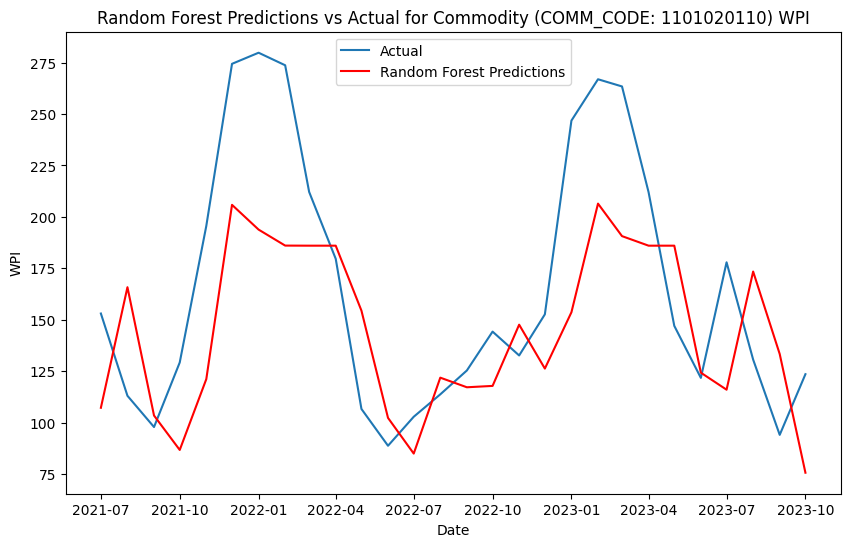

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (assuming the CSV is already available in the current directory)
file_path = 'preprocessed_wpi_data1.csv'  # Update the path as needed
df = pd.read_csv(file_path)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Get user input for COMM_CODE
comm_code = input("Enter the COMM_CODE for the commodity you want to analyze: ")

# Filter and prepare data for the specific commodity
df_commodity = df[df['COMM_CODE'] == int(comm_code)].sort_values('Date')
if df_commodity.empty:
    raise ValueError(f"No data found for COMM_CODE {comm_code}")

# Set 'Date' as index for time series
df_commodity.set_index('Date', inplace=True)

# Create lag features for the Random Forest model (e.g., 1-month, 3-month lag)
df_commodity['WPI_Lag_1'] = df_commodity['WPI'].shift(1)
df_commodity['WPI_Lag_2'] = df_commodity['WPI'].shift(2)
df_commodity['WPI_Lag_3'] = df_commodity['WPI'].shift(3)

# Drop rows with NaN values created by lagging
df_commodity.dropna(inplace=True)

# Prepare features and target variable
X = df_commodity[['WPI_Lag_1', 'WPI_Lag_2', 'WPI_Lag_3']]
y = df_commodity['WPI']

# Split data into training and testing sets (80% train, 20% test)
split_index = int(0.8 * len(X))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Calculate the RMSE for Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f'Random Forest RMSE: {rf_rmse}')

# Plot the Random Forest predictions against actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, rf_predictions, label='Random Forest Predictions', color='red')
plt.title(f'Random Forest Predictions vs Actual for Commodity (COMM_CODE: {comm_code}) WPI')
plt.xlabel('Date')
plt.ylabel('WPI')
plt.legend()
plt.show()


Epoch 1/50


c:\Users\unnie\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1177
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0591 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0470 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0528 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0461 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0409 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0467 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0445 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0462 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0445 
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0423 
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

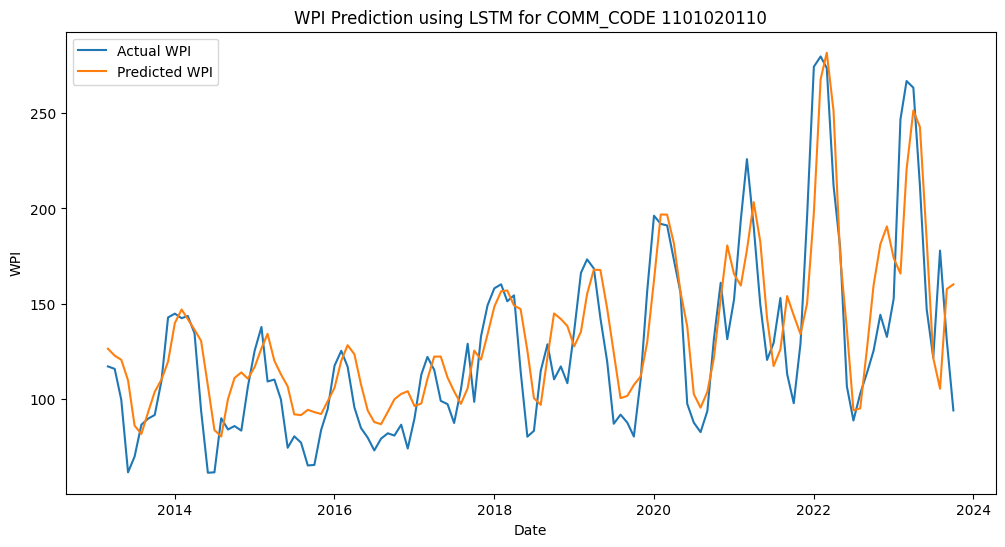

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

comm_code_input = input("Enter the COMM_CODE for the commodity: ")

# Filter the dataframe based on the user input for COMM_CODE
df_filtered = df[df['COMM_CODE'] == int(comm_code_input)]

# Sort by Date
df_filtered = df_filtered.sort_values('Date')

# Normalize WPI column for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
df_filtered['WPI_scaled'] = scaler.fit_transform(df_filtered[['WPI']])

# Prepare the data for LSTM (using a sliding window approach)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Reshape the dataset into LSTM's format
time_step = 10  # Number of previous time steps to consider
wpi_scaled = df_filtered['WPI_scaled'].values.reshape(-1, 1)
X, y = create_dataset(wpi_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # LSTM expects input as [samples, time steps, features]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X)

# Inverse scale the predictions and actual data
predictions = scaler.inverse_transform(predictions)
y_actual = scaler.inverse_transform(y.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Date'][time_step + 1:], y_actual, label='Actual WPI')
plt.plot(df_filtered['Date'][time_step + 1:], predictions, label='Predicted WPI')
plt.title(f'WPI Prediction using LSTM for COMM_CODE {comm_code_input}')
plt.xlabel('Date')
plt.ylabel('WPI')
plt.legend()
plt.show()